# ✈Aviation Flight Fare Prediction Model

<div style="flex:50%; padding:5px;">
    <img src="R.jpg">
</div>

<pre style="font-family: Arial; background-color: #F5F5F5; color: #123456; padding: 10px;font-size: 14px;">
If you are a traveler looking to plan your next trip, or you are an airline or travel agency,
you need to know about ticket and service price variations. 
Airline ticket pricing has become increasingly complex due to factors such as demand 
fluctuations and seasonal trends.
My project aims to help you make the right decision and buy the best ticket at the best price
by developing a predictive model that can accurately estimate flight fares based on the given features.

The dataset used contains information about airline tickets, including:

Airline: The name of the airline company.

Date_of_Journey: The date of the journey.

Source: The origin airport.

Destination: The destination airport.

Route: The flight route.

Dep_Time: The departure time.

Arrival_Time: The arrival time.

Duration: The duration of the flight.

Total_Stops: The total number of stops during the journey.

Additional_Info: Additional services of the flight.

Price: The price of the airline ticket.
</pre>

# 📝Check List:
1. [📚 Importing Libraries](#importing-libraries)
2. [📂 Loading Data](#loading-data)
3. [🔍 Discovering Data](#discovering-data)
   - [❓ Missing Values](#missing-values)
   - [🔄 Duplicates](#duplicates)
4. [📊 EDA](#eda)
   - [⭕ Categorical Columns](#categorical-columns)
   - [🔢 Numerical Columns](#numerical-columns)
   - [⏰ Time Columns](#time-columns)
   - [🗑️ Dropping Unimportant Columns](#dropping-unimportant-columns)
5. [🛠️ Feature Engineering](#feature-engineering)
   - [⚖️ Scaling](#scaling)
   - [🏷️ Encoding](#encoding)
   - [🗑️ Dropping Unimportant Columns](#dropping-unimportant-columns-1)
   - [🔬 PCA](#pca)
6. [📂 Splitting Data](#splitting-data)
7. [⚙️ Initialize estimators and hyperparameters](#initialize-estimators-and-hyperparameters)
8. [📅 Grid Search CV](#grid-search-cv)
9. [🎯 Randomized Search CV](#randomized-search-cv)
10. [📈 The best Model Training](#the-best-model-training)
11. [💾 Saving the model](#saving-the-model)
12. [🧪 Test Data Preparation](#test-data-preparation)
13. [🔄 Load the Model and Predict the Test Data](#load-the-model-and-predict-the-test-data)

## 📚 Importing Libraries <a name="importing-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
from sklearn.pipeline import Pipeline

## 📂 Loading Data <a name="loading-data"></a>

In [ ]:
df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')

In [151]:
df = pd.read_csv("Train set.csv")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# 🔍 Discovering Data <a name="discovering-data"></a>

In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## ❓ Missing Values <a name="missing-values"></a>

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#drop missing values
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## 🔄 Duplicates <a name="duplicates"></a>

In [11]:
df.duplicated().sum()

220

In [12]:
# drop the duplicate rows only
df.drop_duplicates(inplace=True, keep='first')

In [13]:
df.duplicated().sum()

0

# 📊 EDA <a name="eda"></a>

## ⭕ Categorical Columns <a name="categorical-columns"></a>

##### 'Airline' Column

In [14]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df['Airline'].nunique()

12

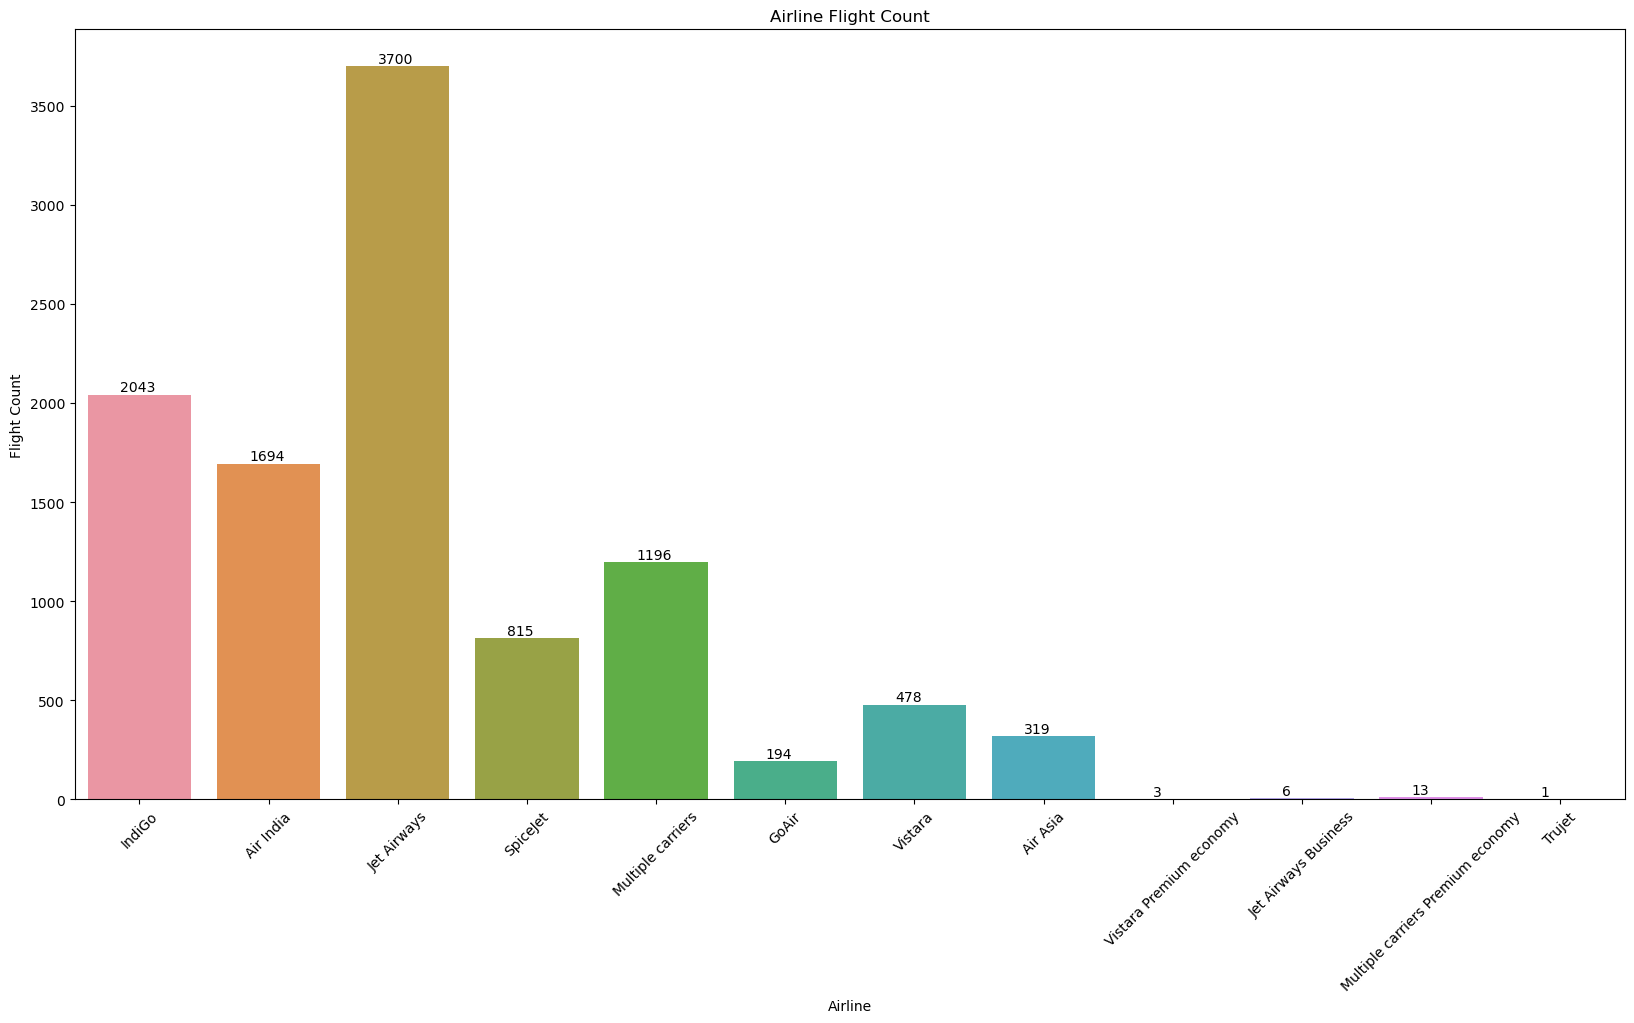

In [16]:
# Plotting Count Plot for Airlines
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Airline')
# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.title('Airline Flight Count')
plt.xticks(rotation = 45)
# display numbers on the plot
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

##### 'Additional_Info' Column

In [17]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [18]:
# replace No Info with No info
df['Additional_Info'] = df['Additional_Info'].str.replace('Info', 'info')

In [19]:
df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [20]:
df['Additional_Info'].nunique()

9

##### 'Destination' Column

In [21]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

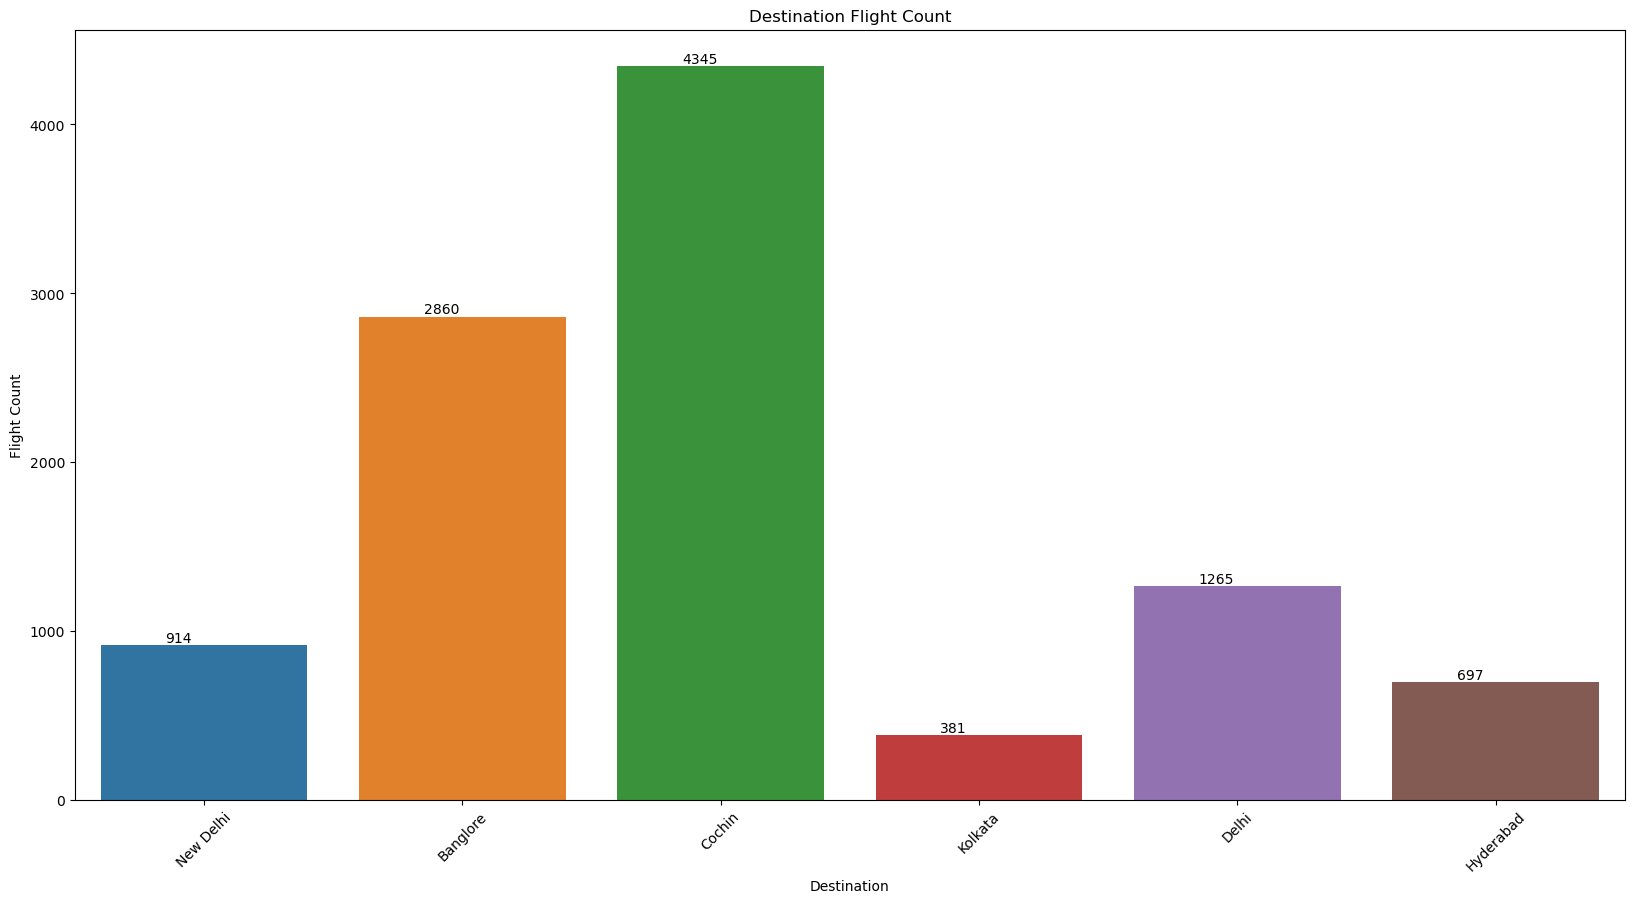

In [22]:
# Plotting count plot for destination Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Destination')

# Set labels and title for the plot
plt.xlabel('Destination')
plt.ylabel('Flight Count')
plt.title('Destination Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [23]:
df['Destination'].nunique()

6

##### 'Source' Column

In [24]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

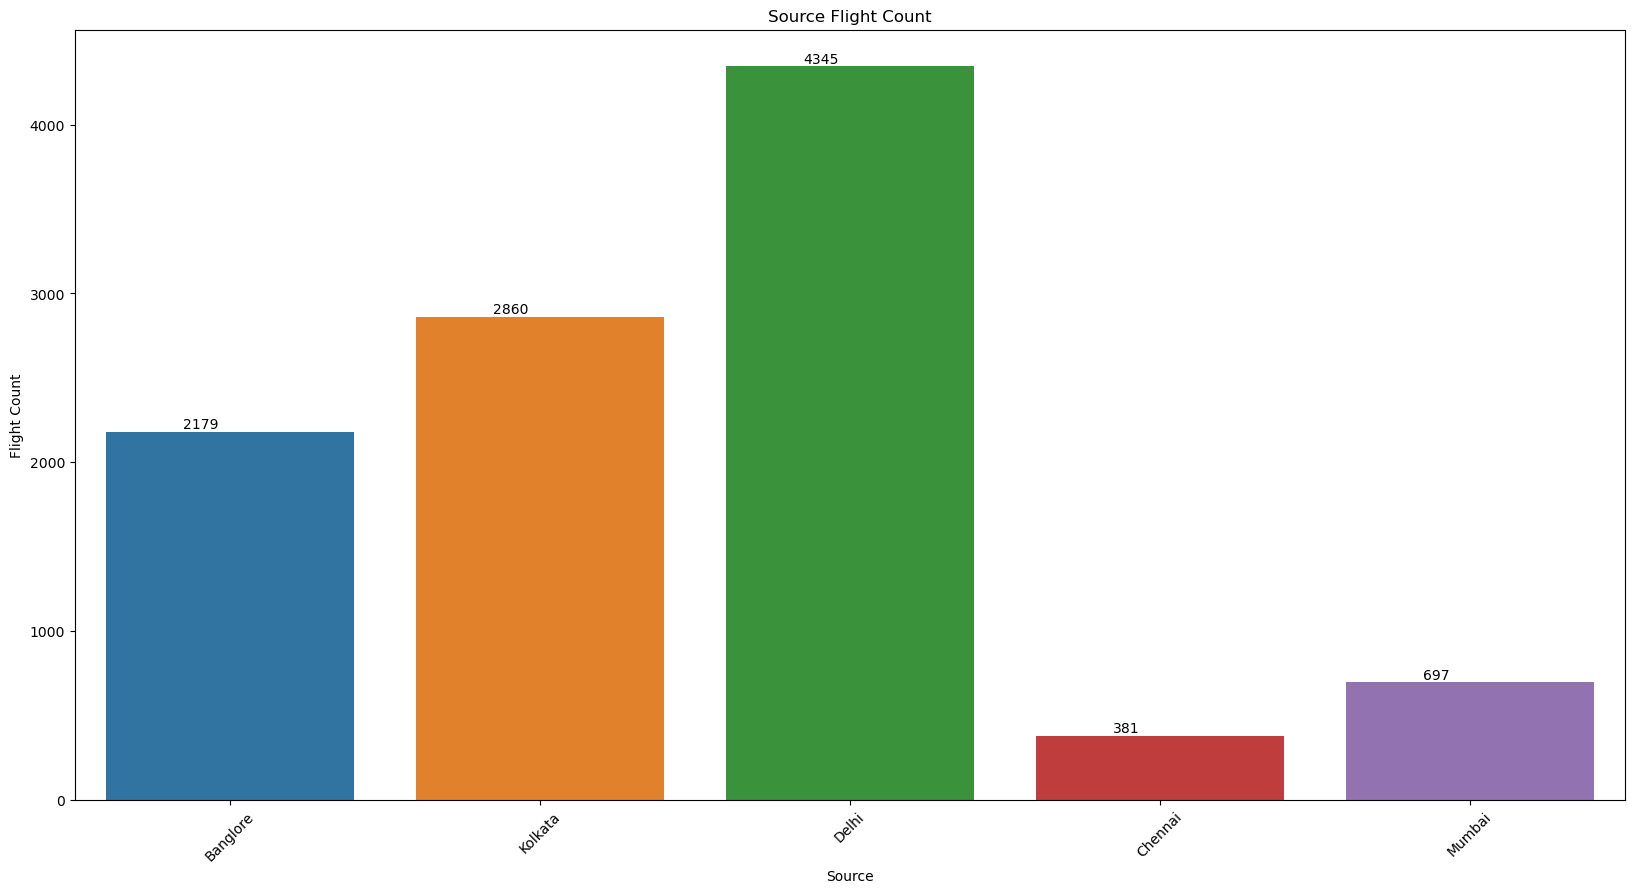

In [25]:
#Plotting count Plot for Source of Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Source')
# Set labels and title for the plot
plt.xlabel('Source')
plt.ylabel('Flight Count')
plt.title('Source Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [26]:
df['Source'].nunique()

5

##### 'Route' Column

In [27]:
df['Route'].nunique()

128

##### 'Total_Stops' Column

In [28]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
# delete stop word and keep number of stops only
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop','0').str.replace(' ', '')\
                                     .str.replace('stop','').str.replace('s','')

In [30]:
df['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

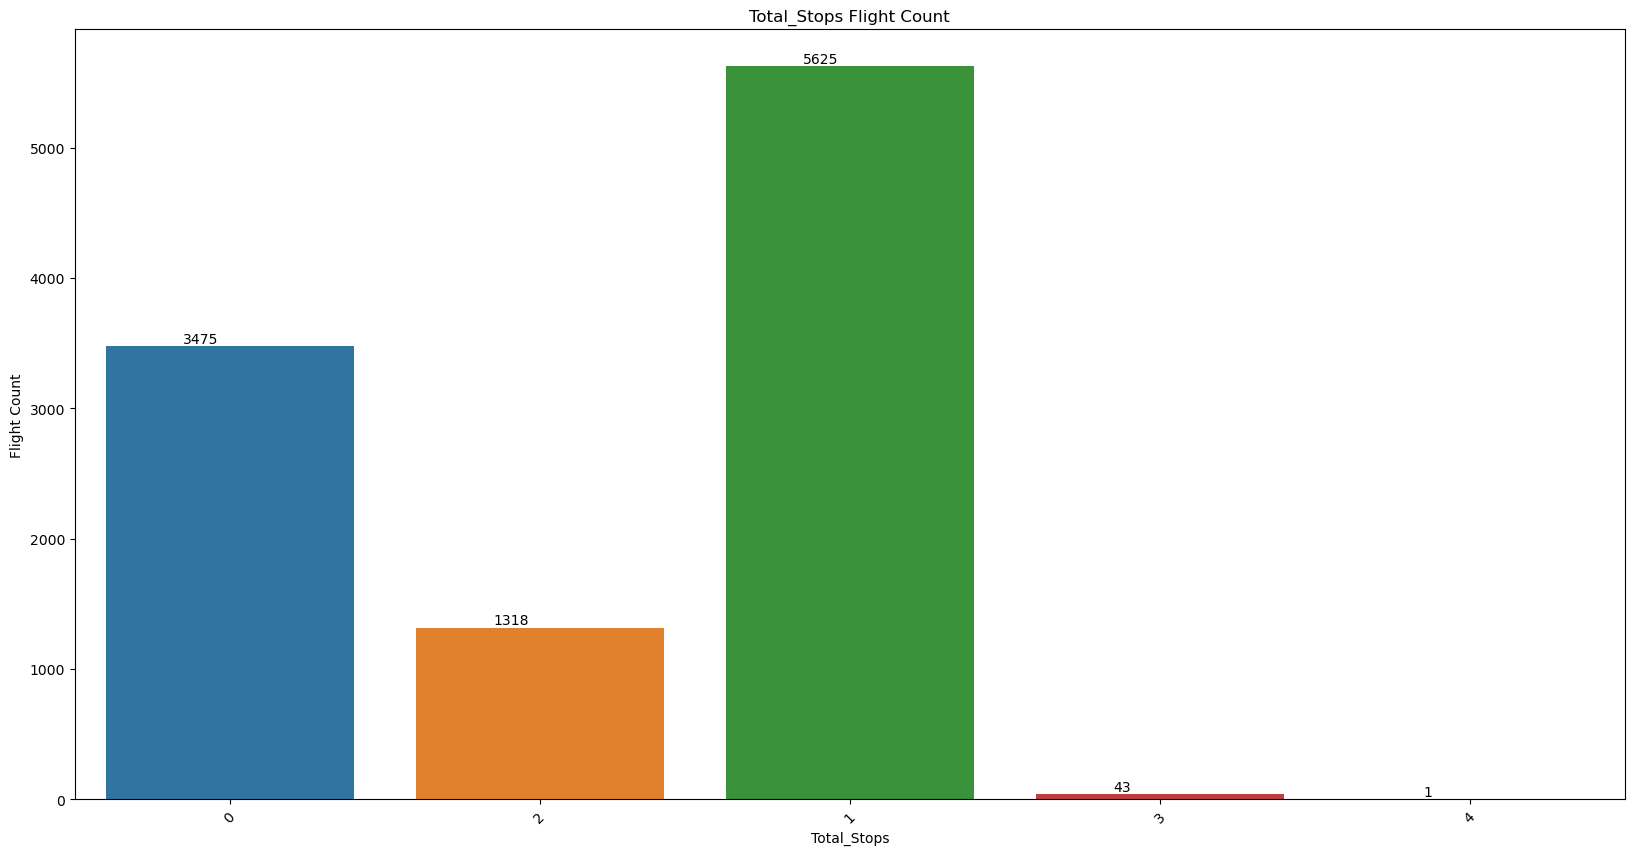

In [31]:
#Plotting count plot for stops in Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Total_Stops')
# Set labels and title for the plot
plt.xlabel('Total_Stops')
plt.ylabel('Flight Count')
plt.title('Total_Stops Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [32]:
df['Total_Stops'].nunique()

5

## 🔢 Numerical Columns <a name="numerical-columns"></a>

In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


##### 'Duration' Column

In [34]:
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [35]:
# convert hours to minutes and delete 'h, m'.
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '')
# convert the column to int data type
df['Duration'] = df['Duration'].apply(eval).astype('int64')

In [36]:
df['Duration'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration, dtype: int64

## ⏰ Time Columns <a name="time-columns"></a>

#### 'Date_of_Journey' Column

In [37]:
# Extract day, month, and year from 'Date_of_Journey' column
df[['Day', 'Month', 'Year']] = df['Date_of_Journey'].str.split('/', expand=True)

In [38]:
# check values of days
df['Day'].value_counts()

9     1275
6     1173
27    1092
21    1085
24    1022
15     967
12     946
1      907
18     814
3      743
01     151
09     100
06      95
03      92
Name: Day, dtype: int64

In [39]:
# delete 0 from the day number
df['Day'] = df['Day'].str.replace('0', '')

In [40]:
df['Day'].unique()

array(['24', '1', '9', '12', '27', '18', '3', '15', '6', '21'],
      dtype=object)

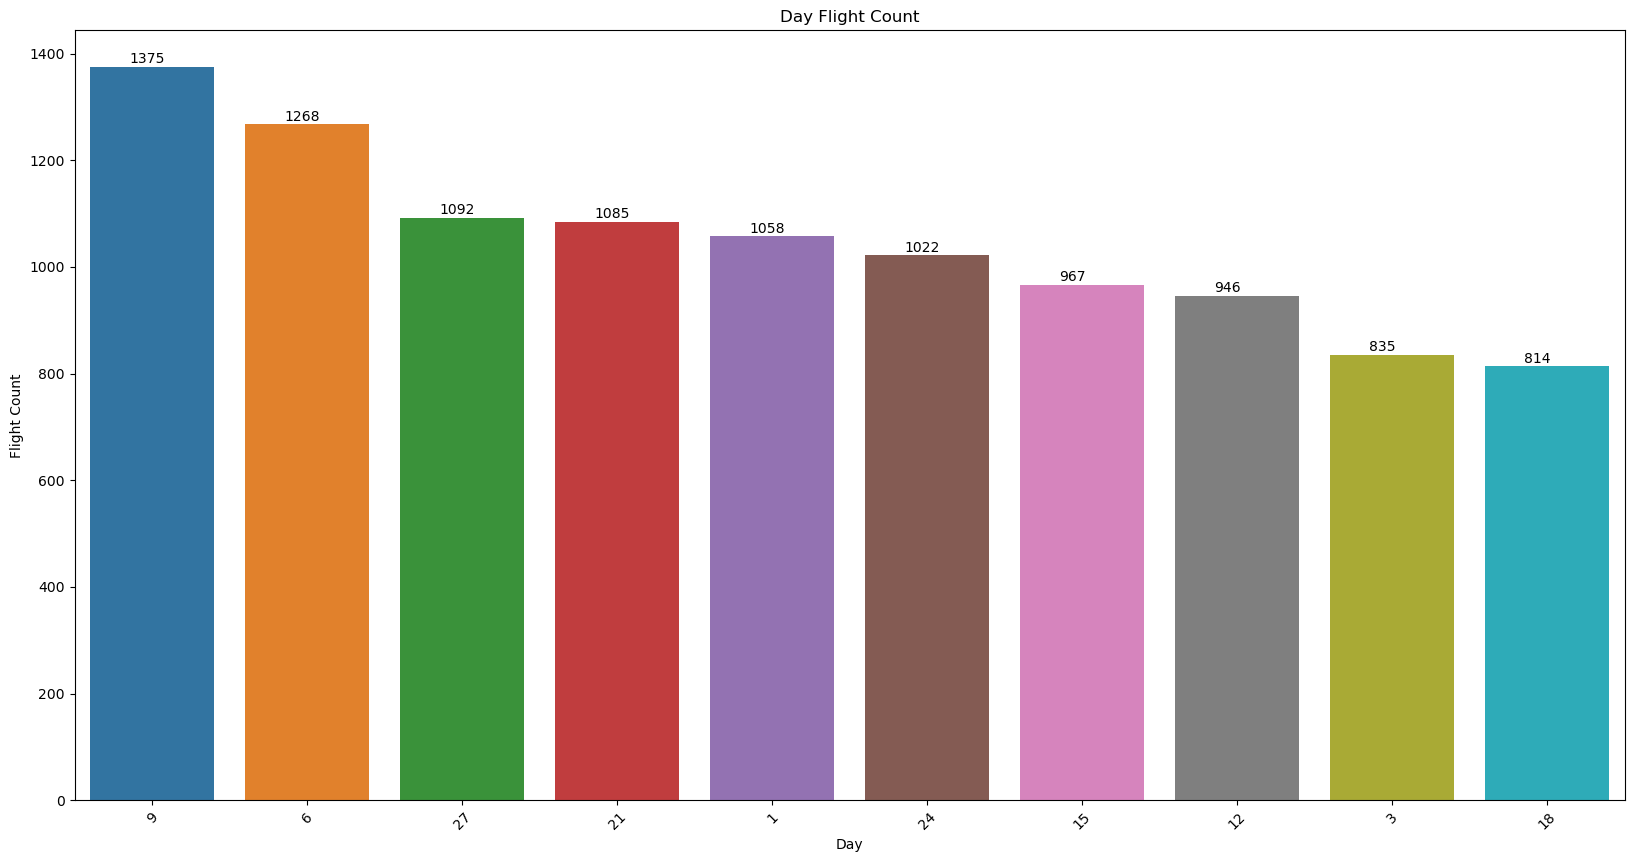

In [41]:
# Plotting count Plot for Day flights
plt.figure(figsize=(20, 10))
sorted_df = df['Day'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Day', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Flight Count')
plt.title('Day Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

# Display the plot
plt.show()

In [42]:
# check values of Months
df['Month'].value_counts()

05    3395
06    3311
03    2678
04    1078
Name: Month, dtype: int64

In [43]:
# delete 0 from the Month number
df['Month'] = df['Month'].str.replace('0', '')

In [44]:
df['Month'].unique()

array(['3', '5', '6', '4'], dtype=object)

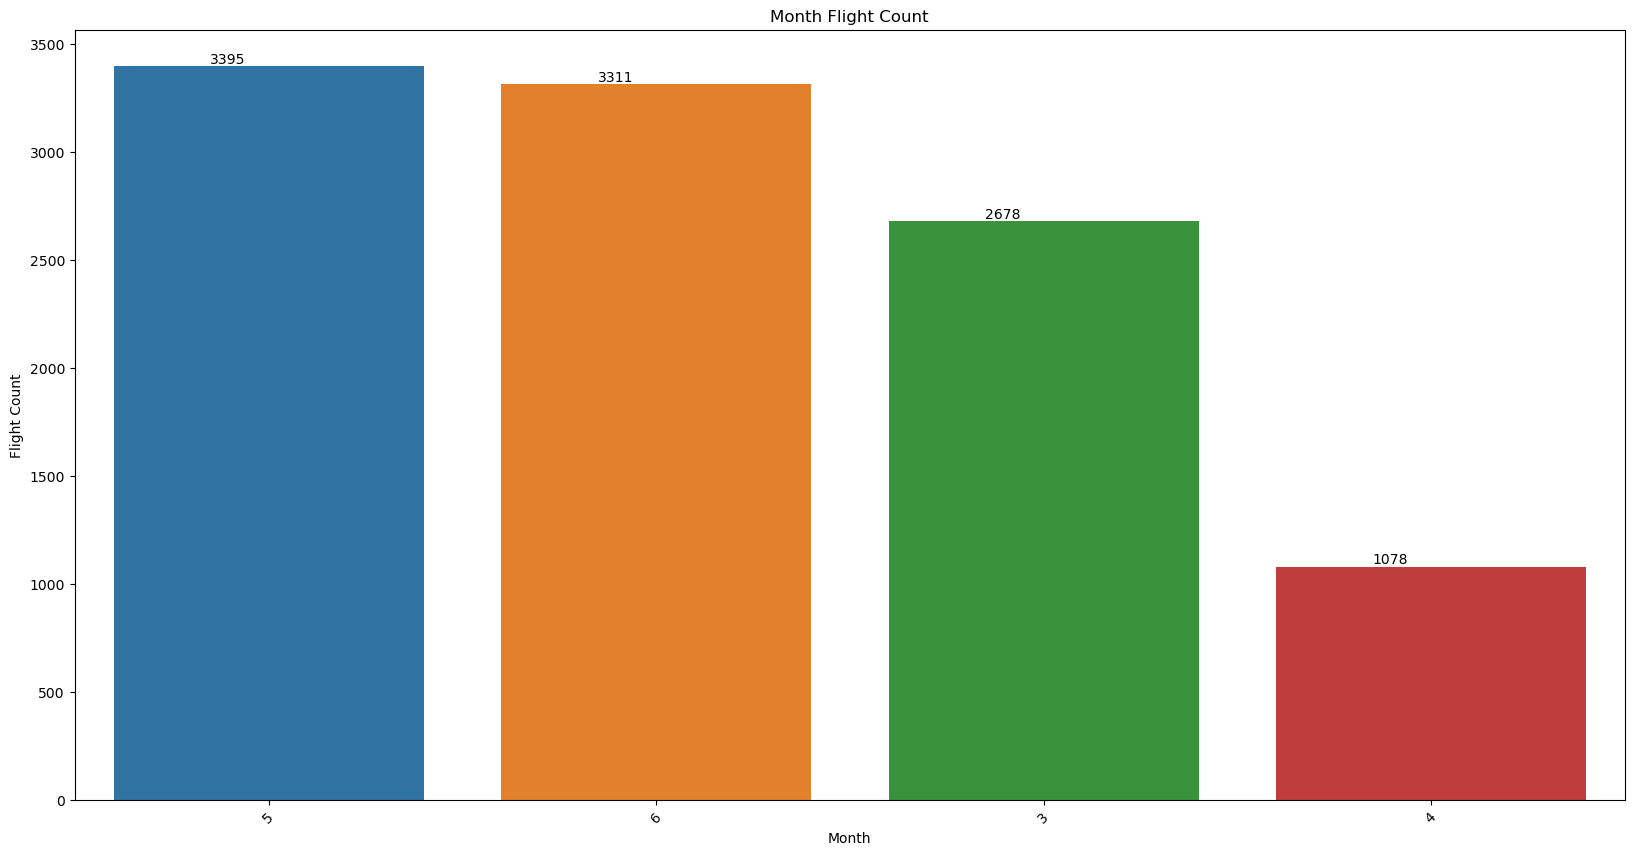

In [45]:
# Plotting count Plot for Month flights
plt.figure(figsize=(20, 10))
sorted_df = df['Month'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Month', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Month Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

# Display the plot
plt.show()

In [46]:
# # check values of Years
df['Year'].value_counts()

2019    10462
Name: Year, dtype: int64

#### 'Dep_Time' Column

In [47]:
# convert Dep_Time column to datetime object
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [48]:
# increase the hour if the minutes above 30
def apro_time(time):
    adjusted_time = time + pd.DateOffset(hours=1) if time.minute > 30 else time
    
    return adjusted_time.hour

In [49]:
# apply 'apro_time' on 'Dep_Time' column
df['Dep_Hour'] = df['Dep_Time'].apply(apro_time)

## 🗑️ Dropping Unimportant Columns <a name="dropping-unimportant-columns"></a>

In [50]:
# delete unimportant columns
df = df.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Dep_Time', 'Year'], axis=1)

In [51]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,17


In [52]:
# Save Cleaned data
df.to_csv('cleaned_df.csv')

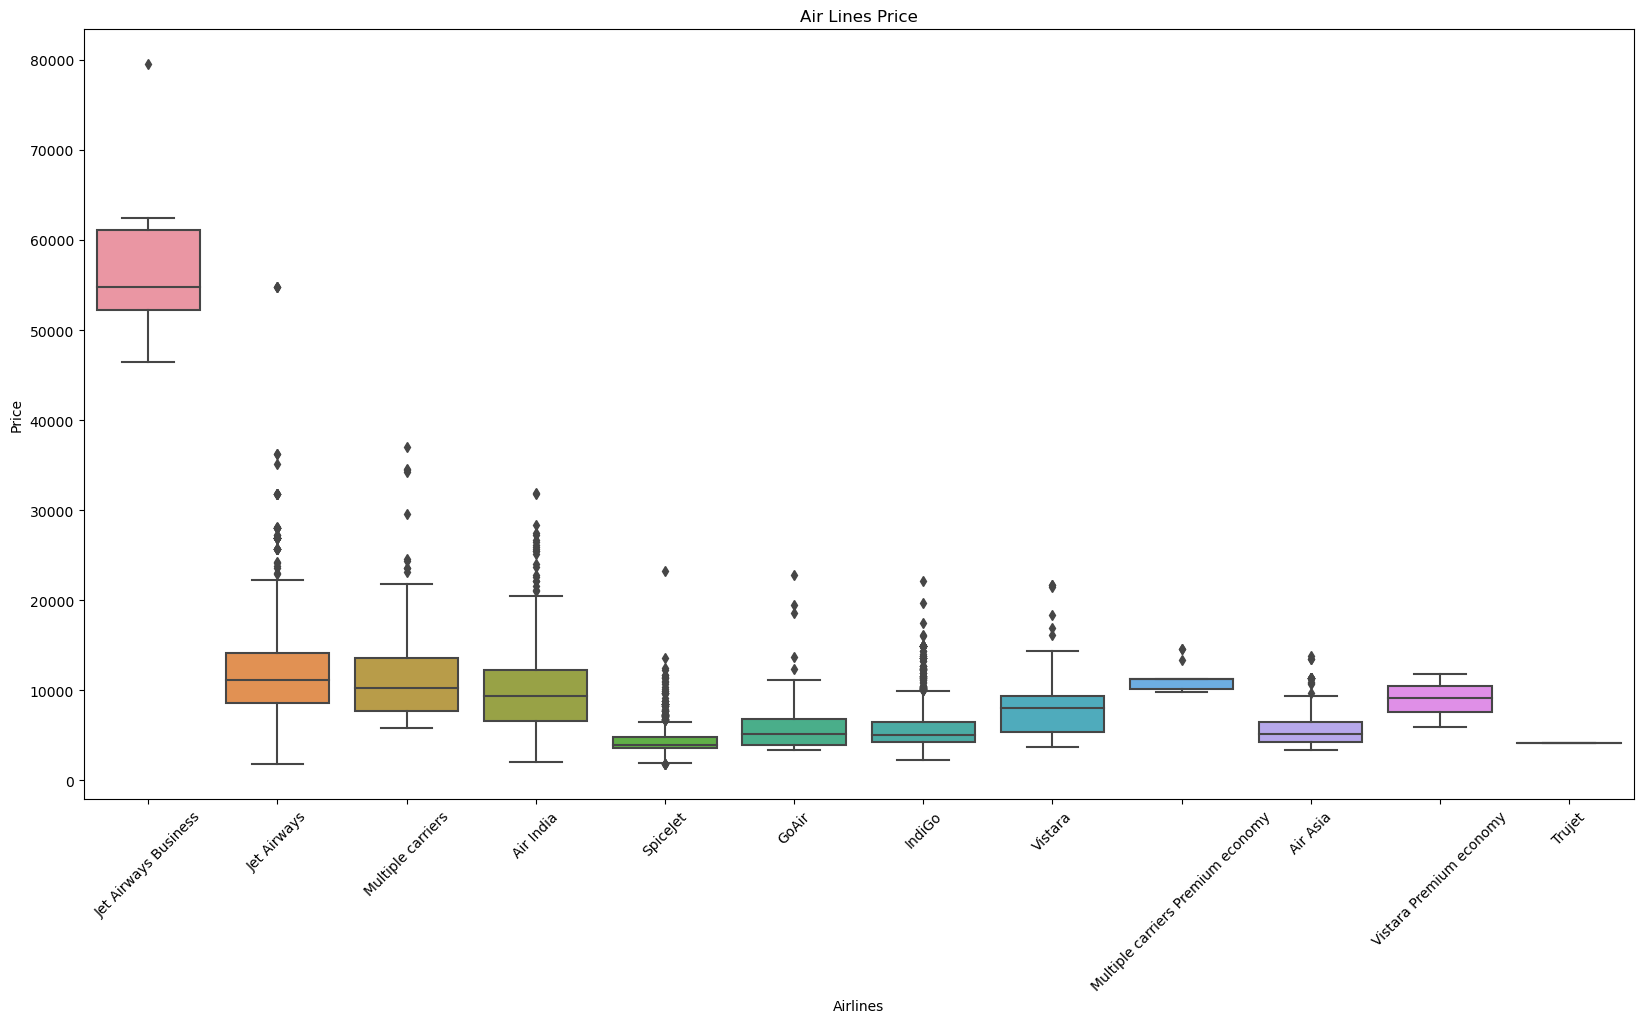

In [53]:
# Air line Prices
plt.figure(figsize=(20,10))

#Plotting box plot for price for each airline
sns.boxplot(data=df.sort_values('Price',ascending=False), x='Airline', y='Price')

# Set labels and title for the plot
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Air Lines Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

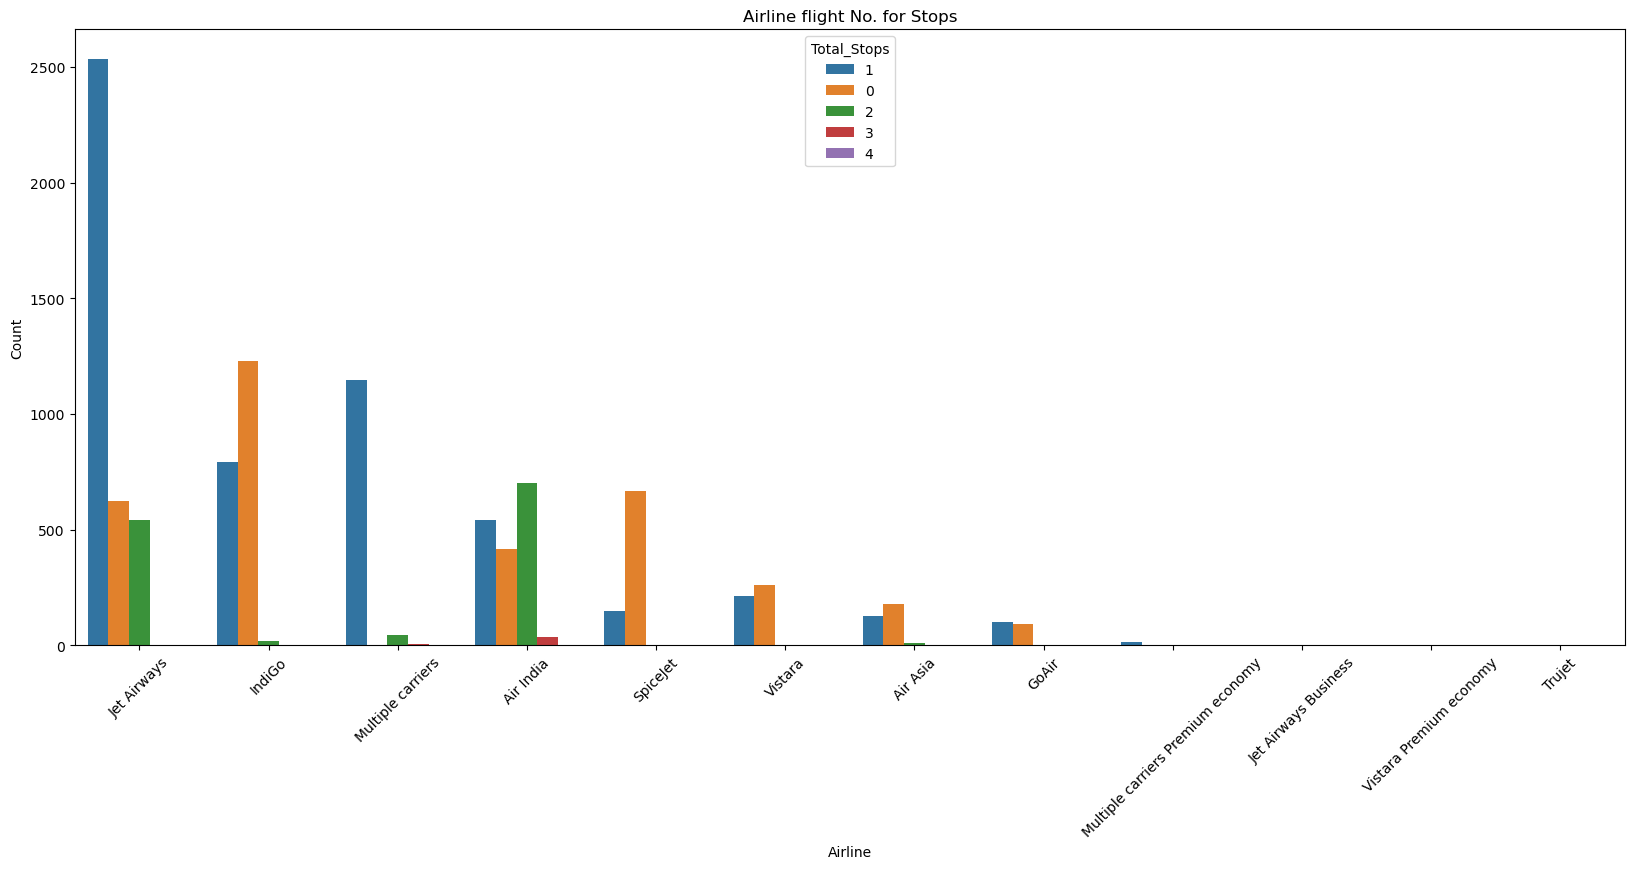

In [54]:
# Airline flights per stops
plt.figure(figsize =(20,8))

#Plotting Bar plot for No. of flights for each airline regarding to Flight stops
grouped_counts = df.groupby(['Airline', 'Total_Stops'])\
                .size().sort_values(ascending=False).reset_index(name='Count')

sns.barplot(data=grouped_counts, x='Airline', y='Count', hue='Total_Stops')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline flight No. for Stops')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

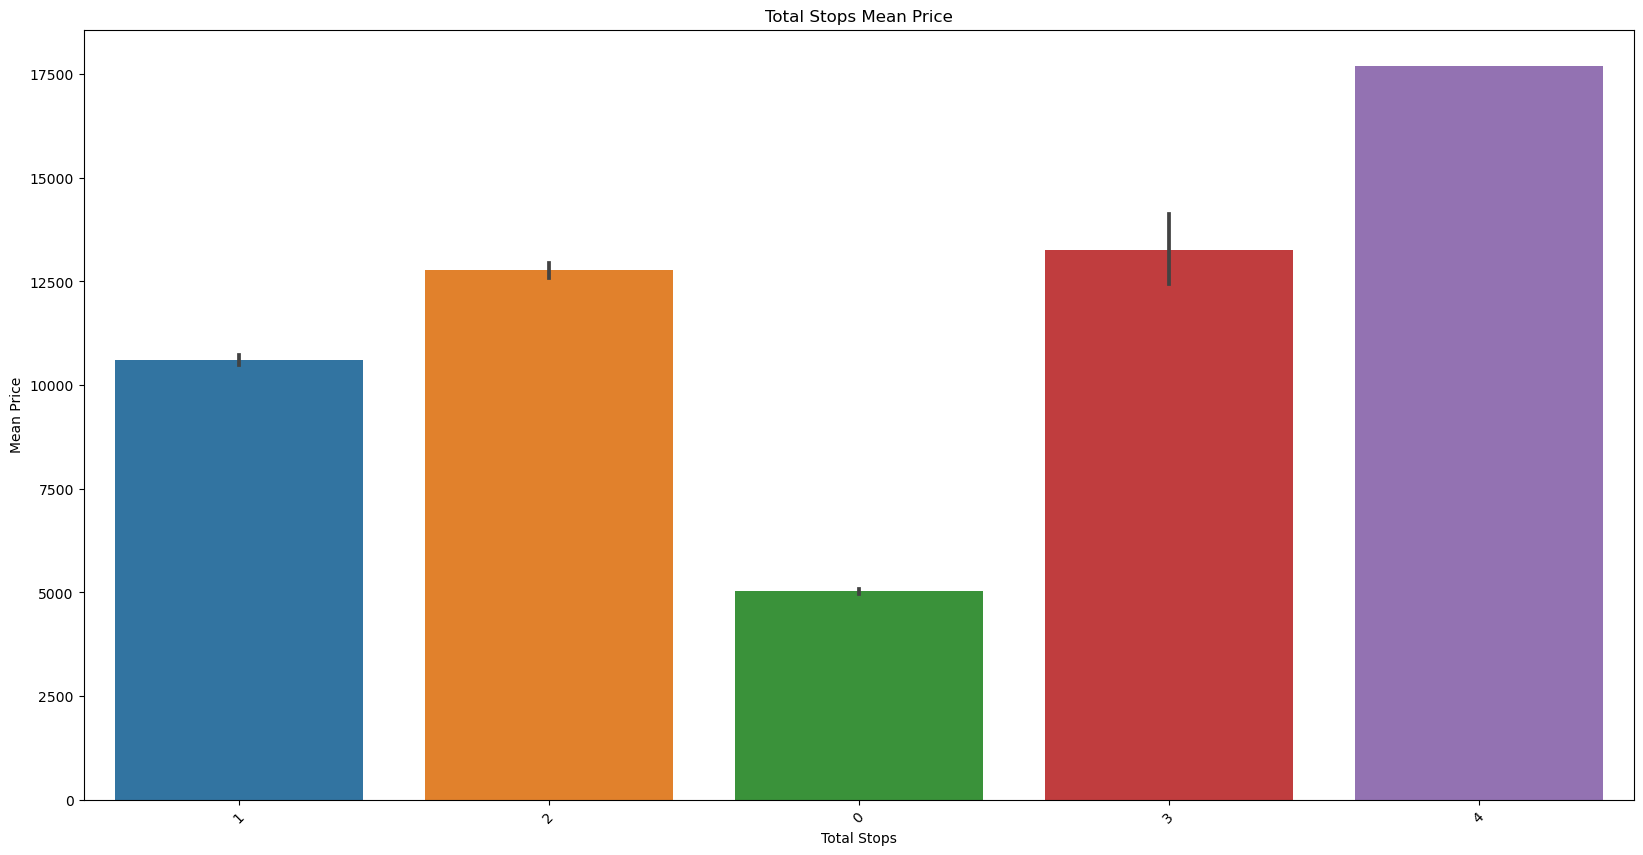

In [55]:
# Total_Stops vs Price
plt.figure(figsize=(20,10))

sns.barplot(data=df.sort_values('Price',ascending=False), x='Total_Stops', y='Price')

# Set labels and title for the plot
plt.xlabel('Total Stops')
plt.ylabel('Mean Price')
plt.title('Total Stops Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

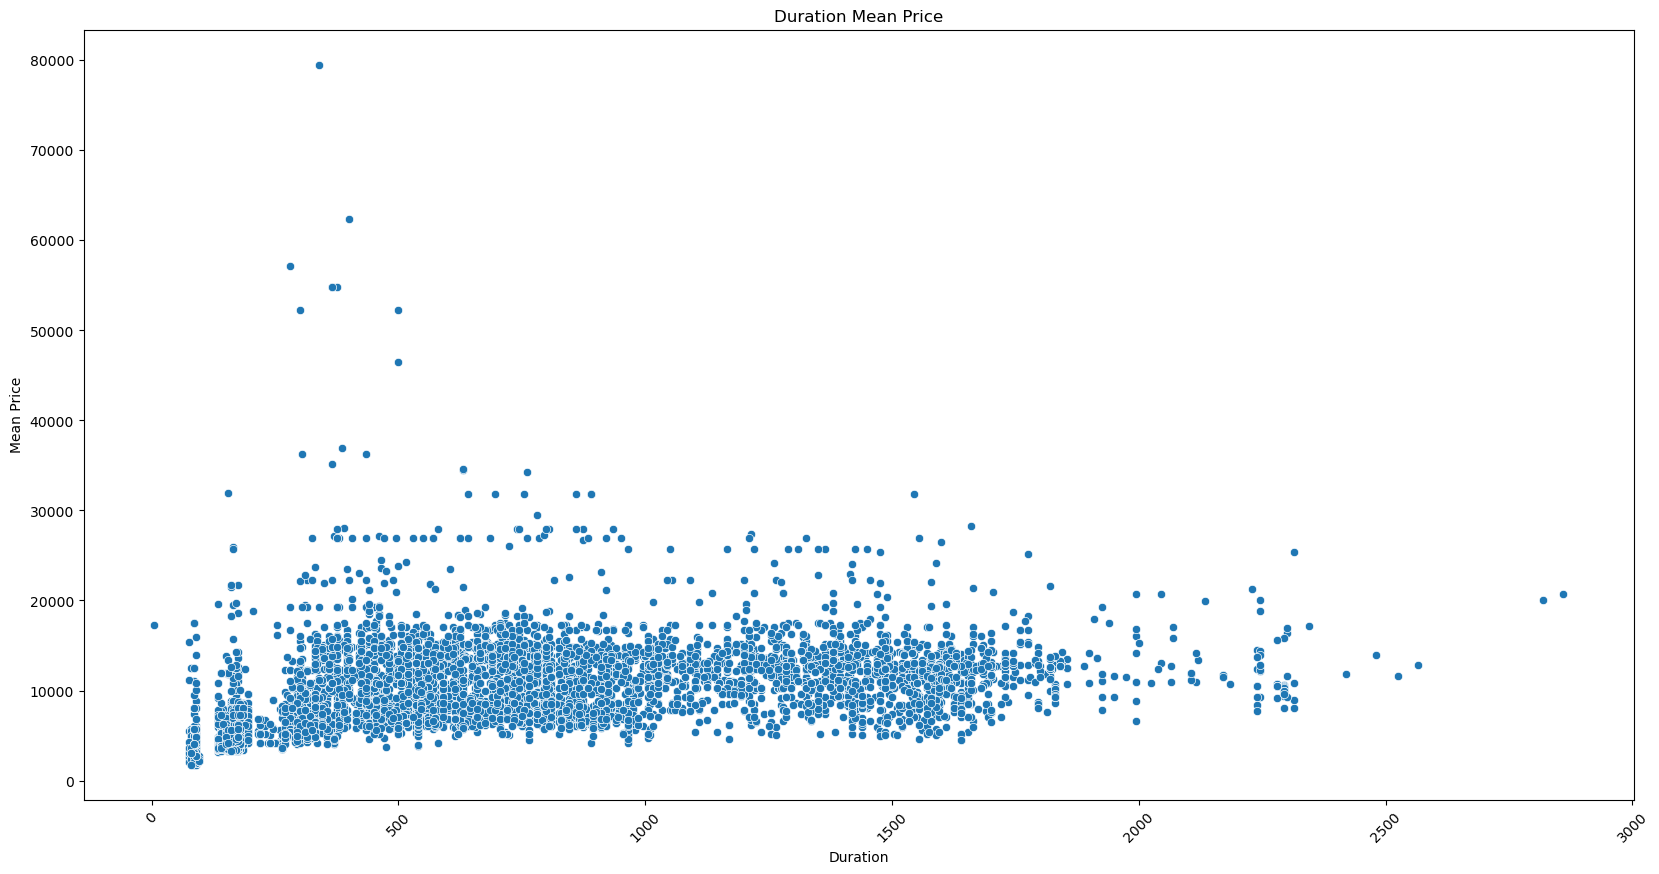

In [56]:
# Duration vs Price
plt.figure(figsize=(20,10))

sns.scatterplot(data=df, x='Duration', y='Price')

# Set labels and title for the plot
plt.xlabel('Duration')
plt.ylabel('Mean Price')
plt.title('Duration Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

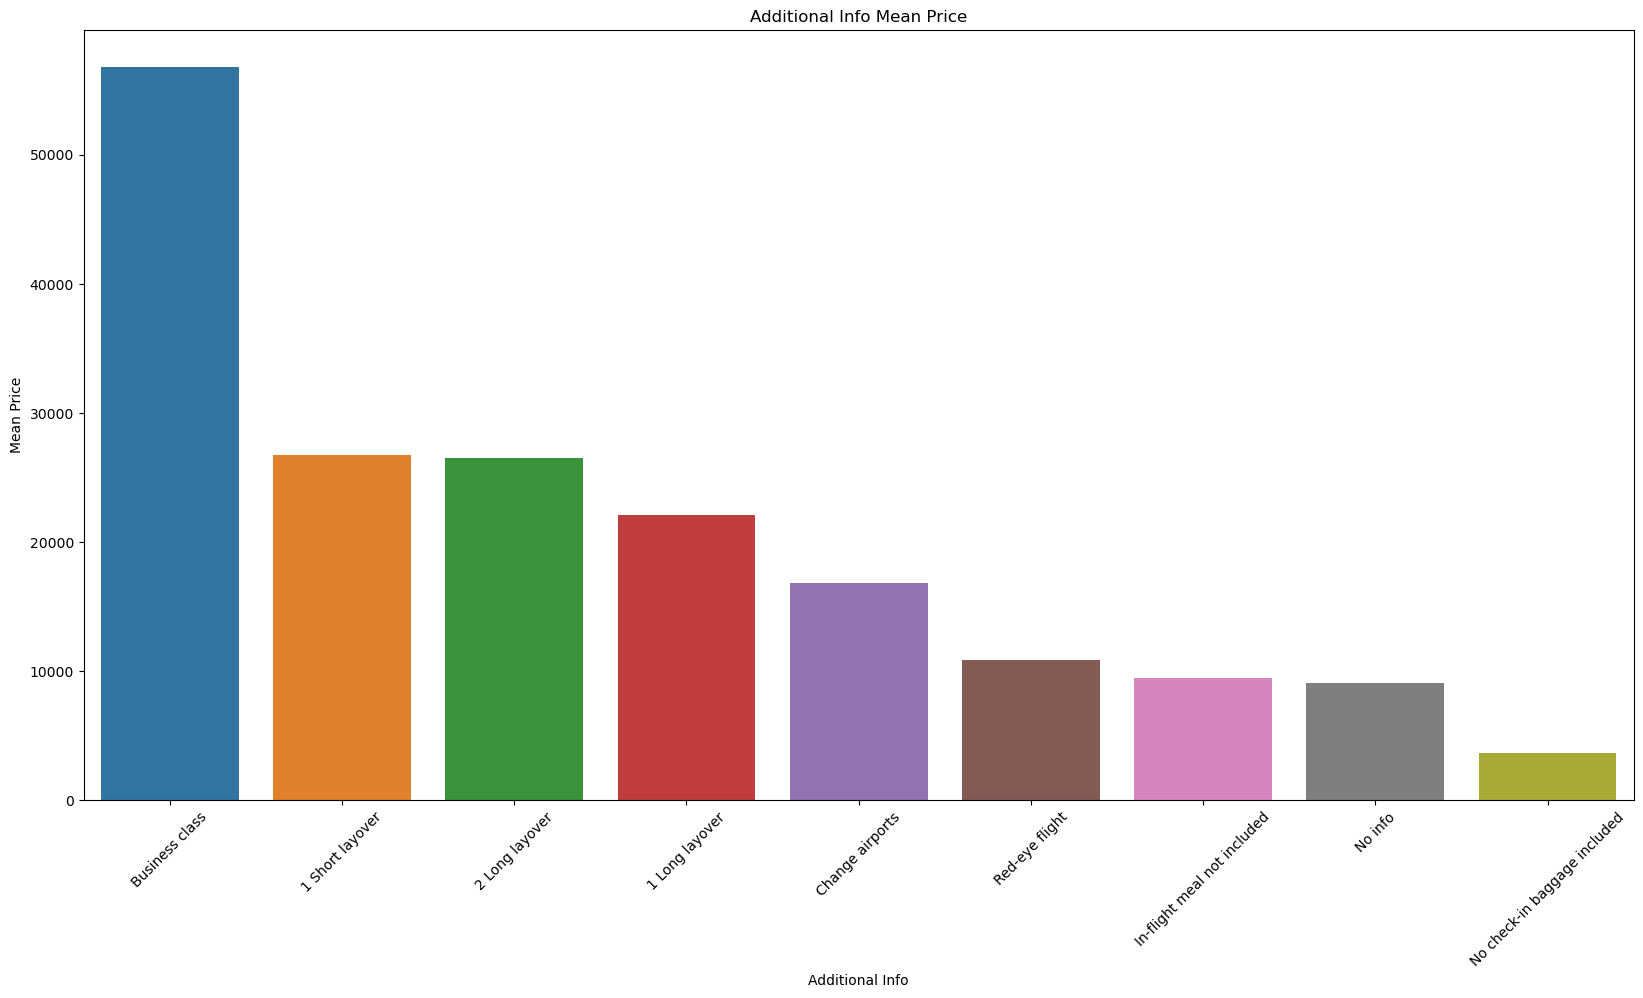

In [57]:
# Additional_Info vs Price
plt.figure(figsize=(20,10))

# Sort the DataFrame by mean price in descending order
sorted_df = df.groupby('Additional_Info')['Price'].mean()\
           .sort_values(ascending=False).reset_index()

sns.barplot(data=sorted_df, x='Additional_Info', y='Price')

# Set labels and title for the plot
plt.xlabel('Additional Info')
plt.ylabel('Mean Price')
plt.title('Additional Info Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

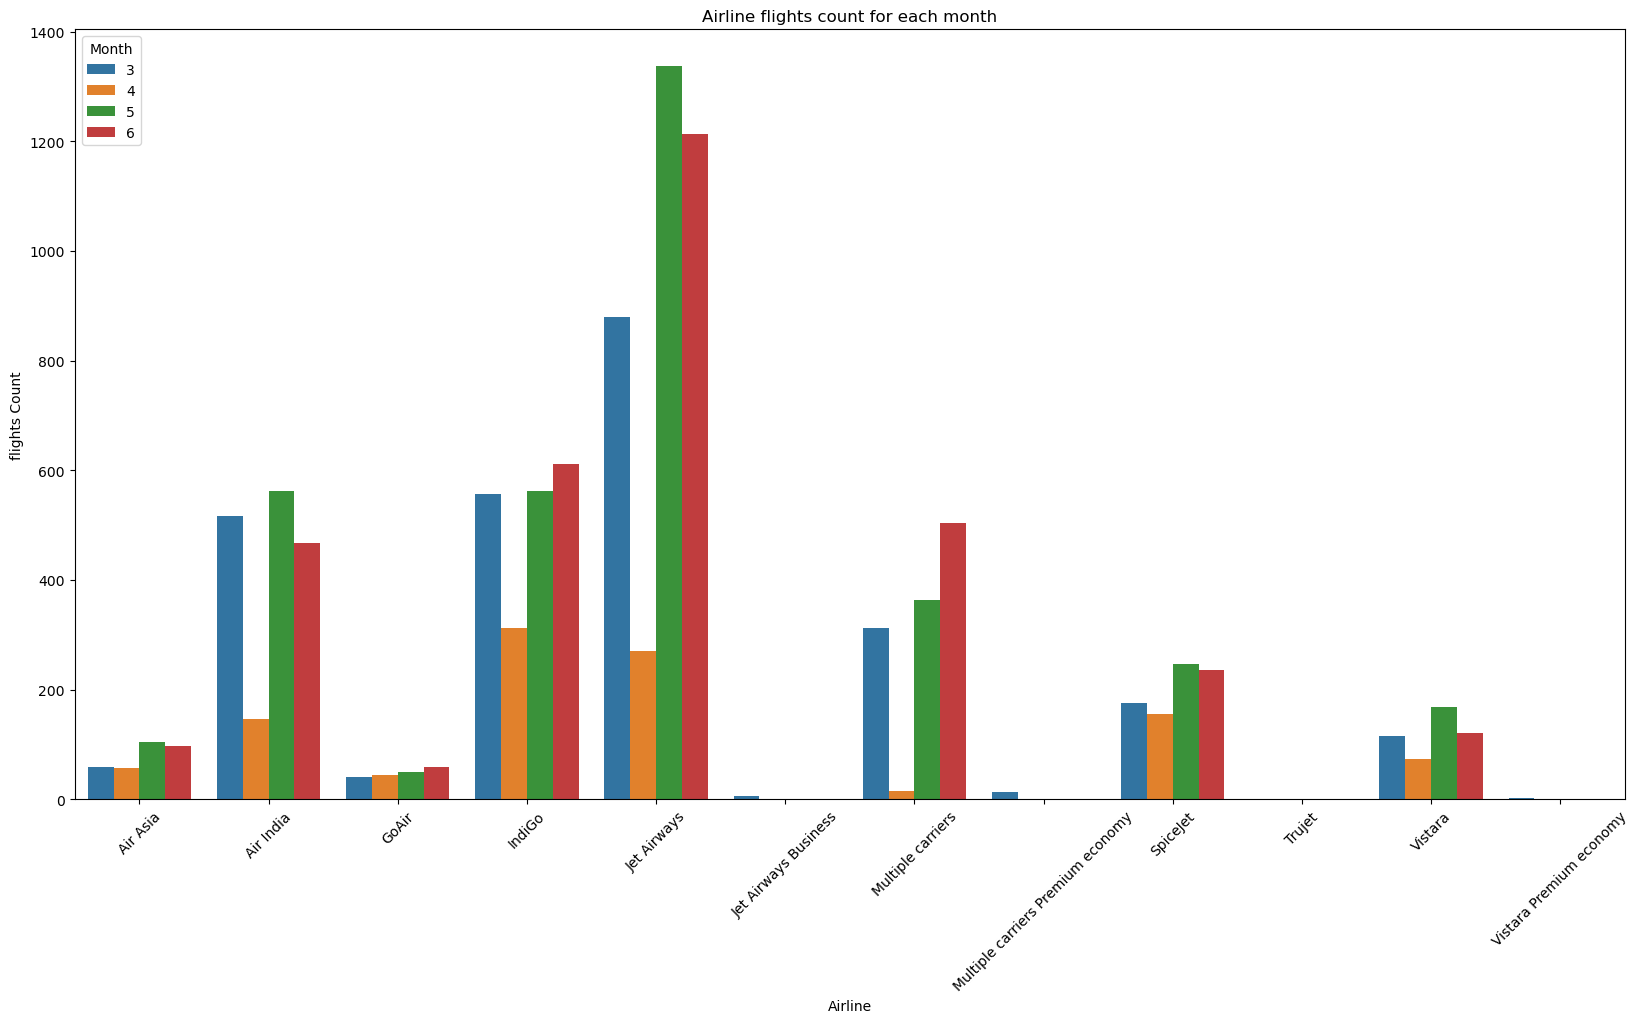

In [58]:
# Airline flights count for each month
plt.figure(figsize=(20,10))

sorted_df = df.groupby(['Airline', 'Month']).size().reset_index().rename(columns={0: 'Count'})

# Plot a Barplot
sns.barplot(data=sorted_df, x='Airline', y='Count', hue='Month')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('flights Count')
plt.title('Airline flights count for each month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

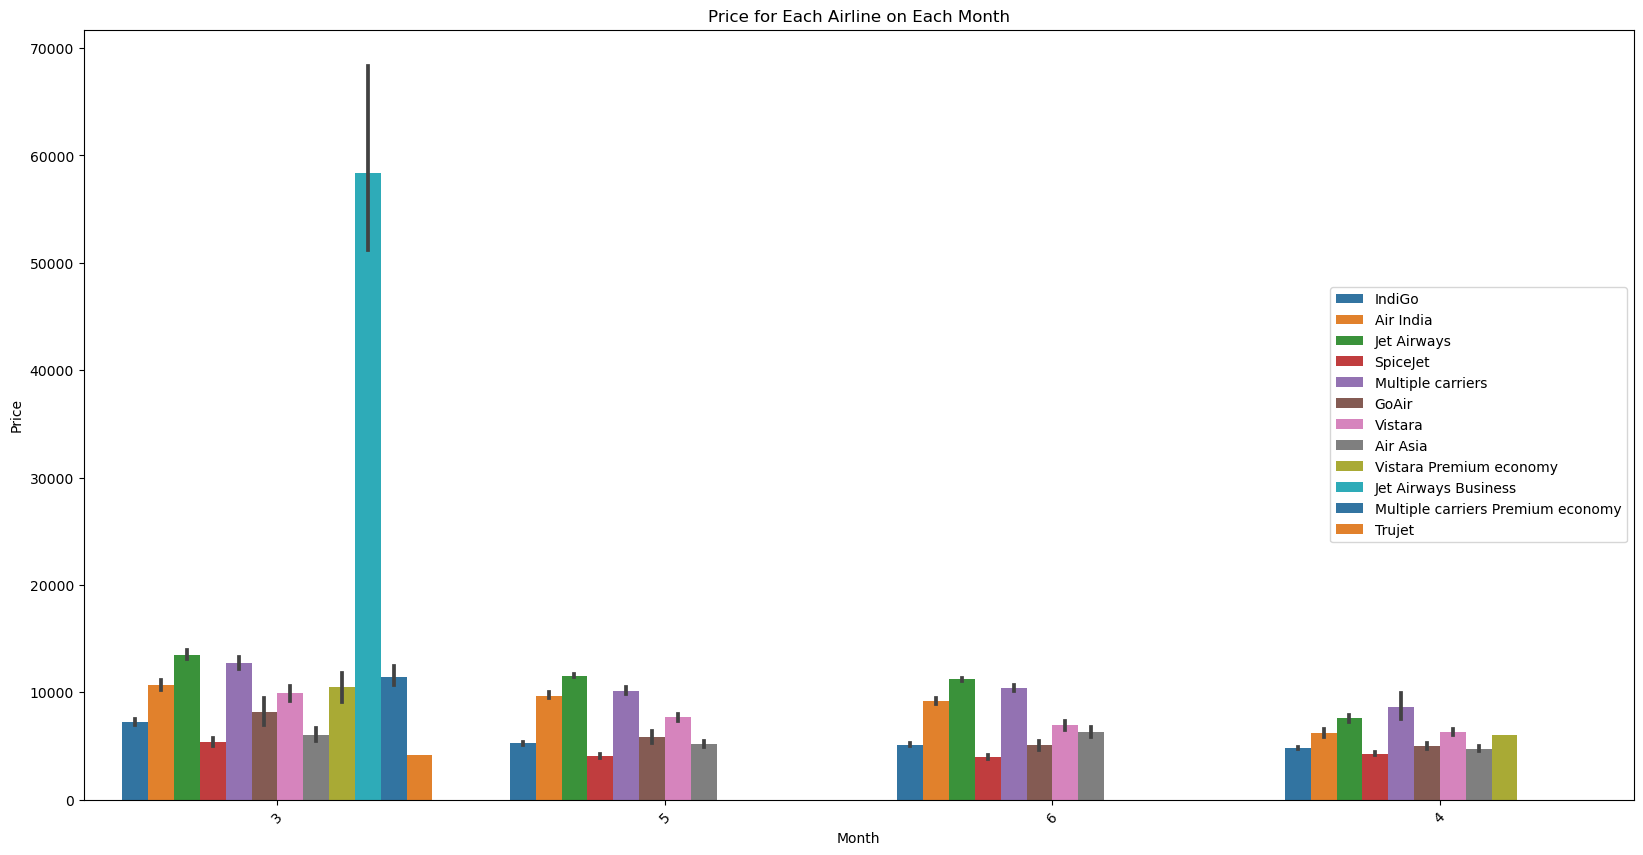

In [59]:
# Airline flights price for each month
plt.figure(figsize=(20, 10))

# Plot monthly prices with barplot
sns.barplot(data=df, x='Month', y='Price', hue='Airline',
              palette='tab10')

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Move the legend to the right
plt.legend(loc='center right')

# Display the plot
plt.show()

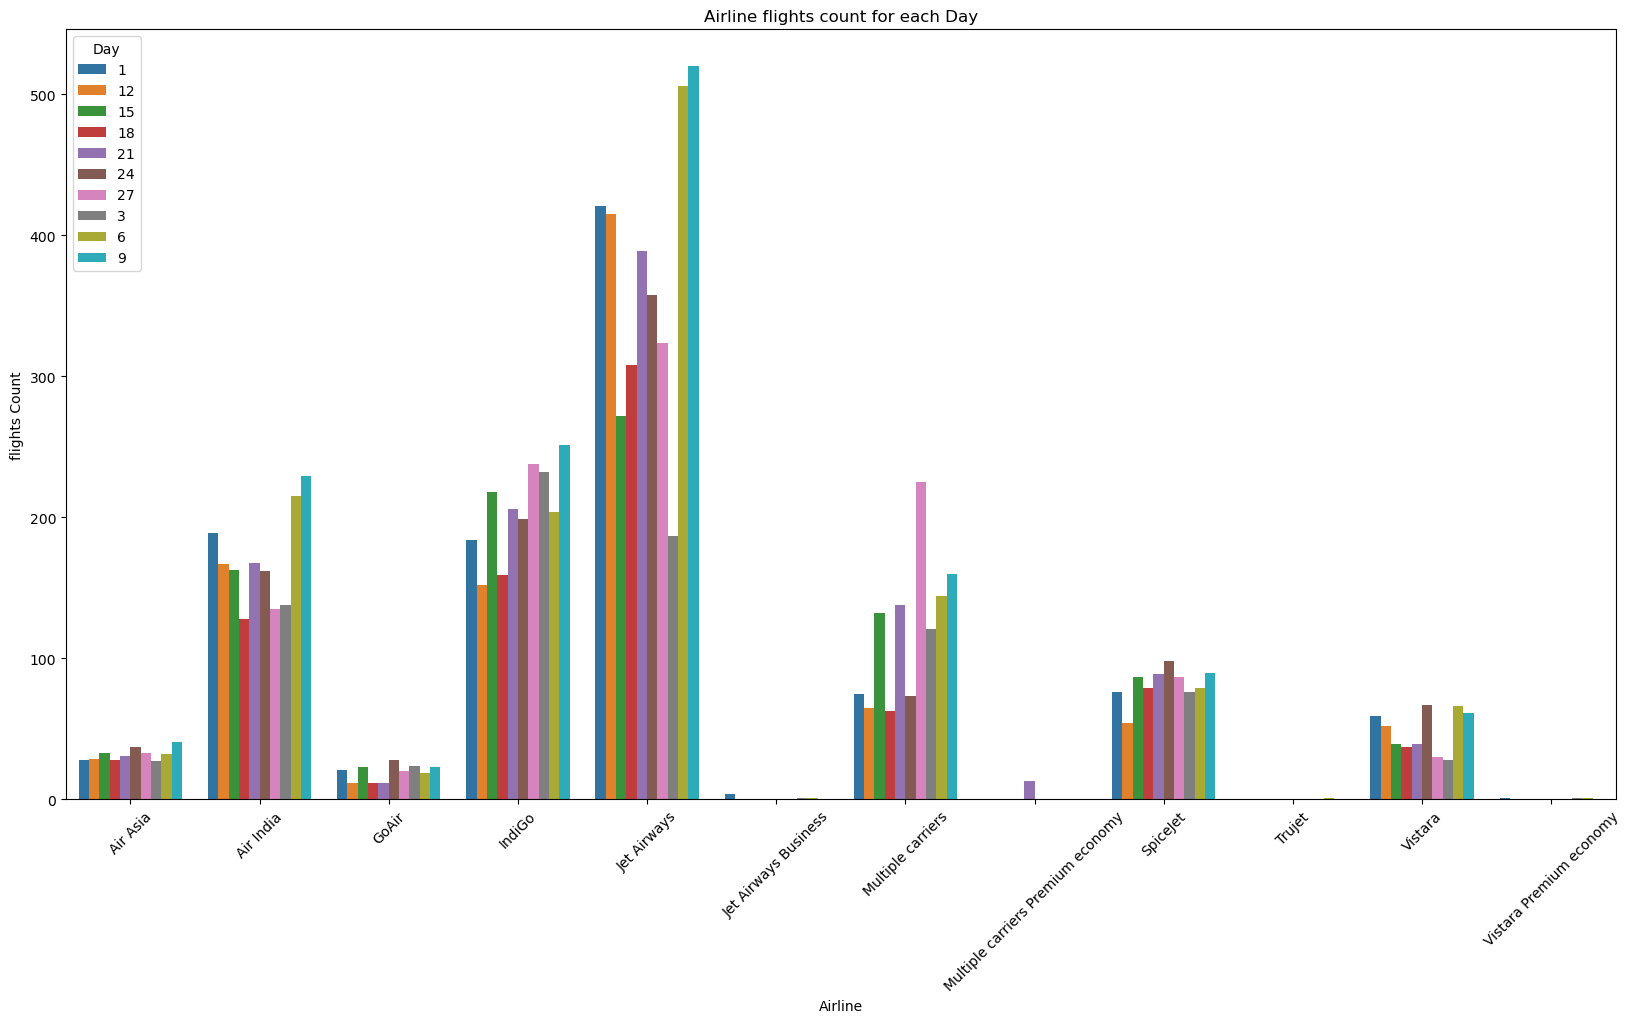

In [60]:
# Airline flights count for each Day
plt.figure(figsize=(20,10))
sorted_df = df.groupby(['Airline', 'Day']).size().reset_index().rename(columns={0: 'Count'})

# Plot a Barplot
sns.barplot(data=sorted_df, x='Airline', y='Count', hue='Day', palette='tab10')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('flights Count')
plt.title('Airline flights count for each Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

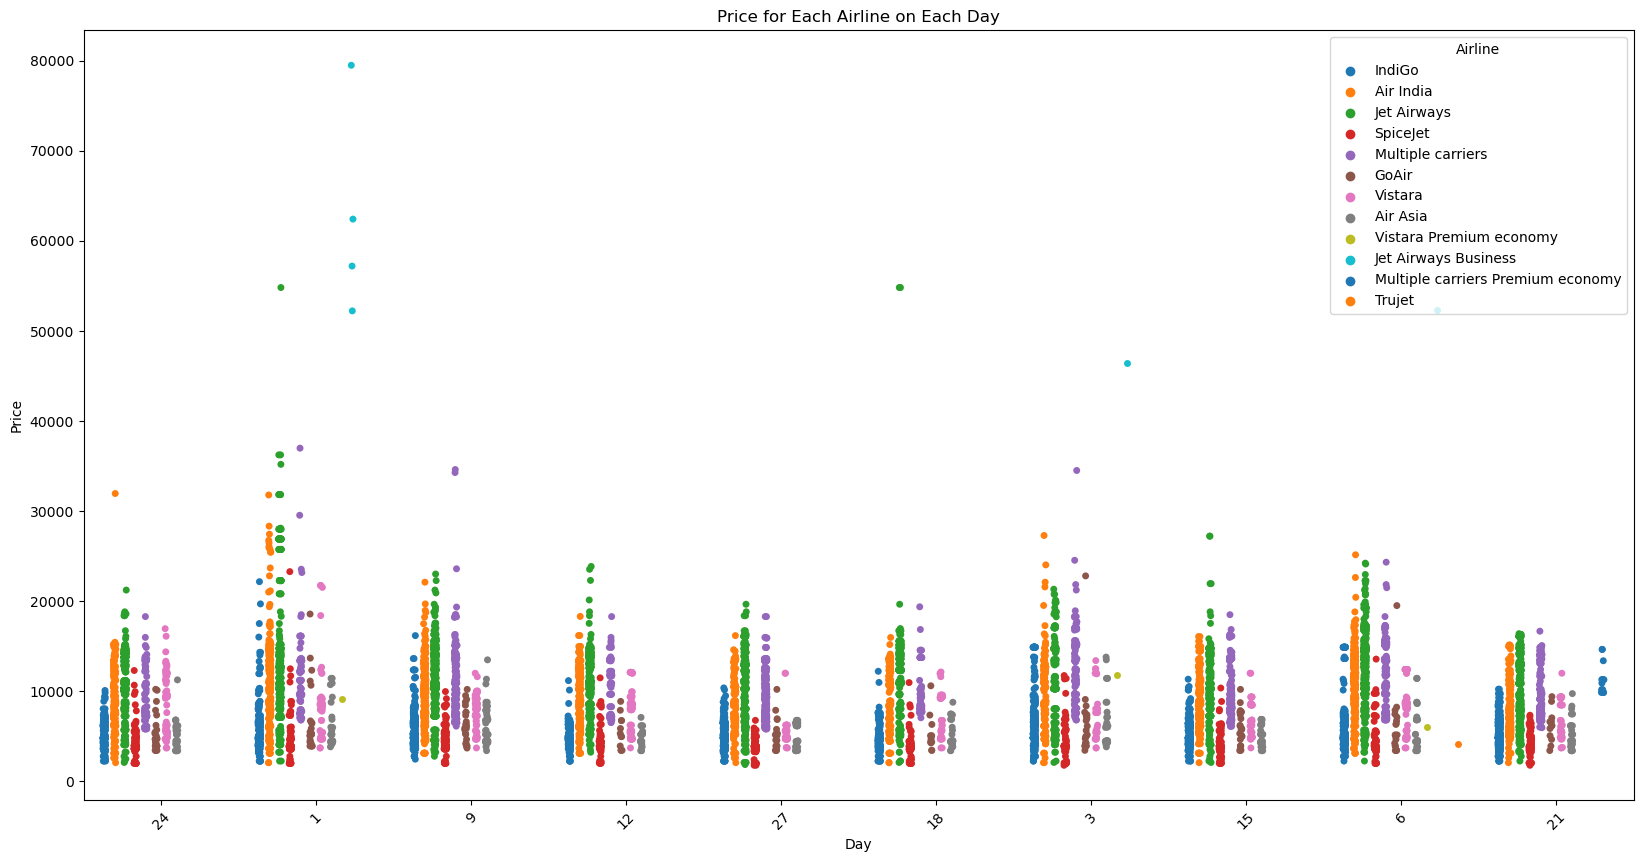

In [61]:
# Airline flights price for each Day
plt.figure(figsize=(20, 10))

# Plot individual prices with stripplot
sns.stripplot(data=df, x='Day', y='Price', hue='Airline',
              jitter=True, dodge=True, palette='tab10')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

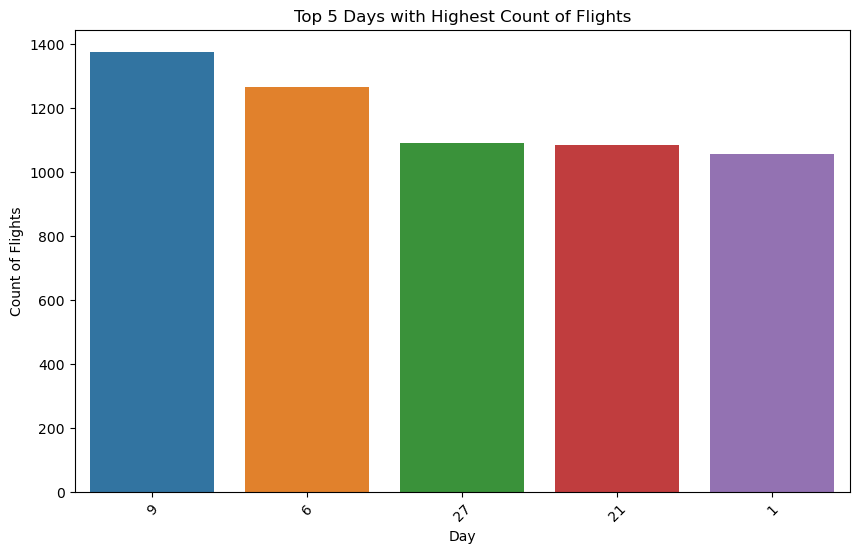

In [62]:
# Calculate the count of flights for each day
flight_counts = df['Day'].value_counts().reset_index()
flight_counts.columns = ['Day', 'Count']

# Sort the data in descending order based on the count of flights
sorted_counts = flight_counts.sort_values('Count', ascending=False)

# Select the top 5 days with the highest count
top_5_days = sorted_counts.head(5)

# Plot a bar chart to visualize the count of flights for the top 5 days
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_days, x='Day', y='Count')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Count of Flights')
plt.title('Top 5 Days with Highest Count of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

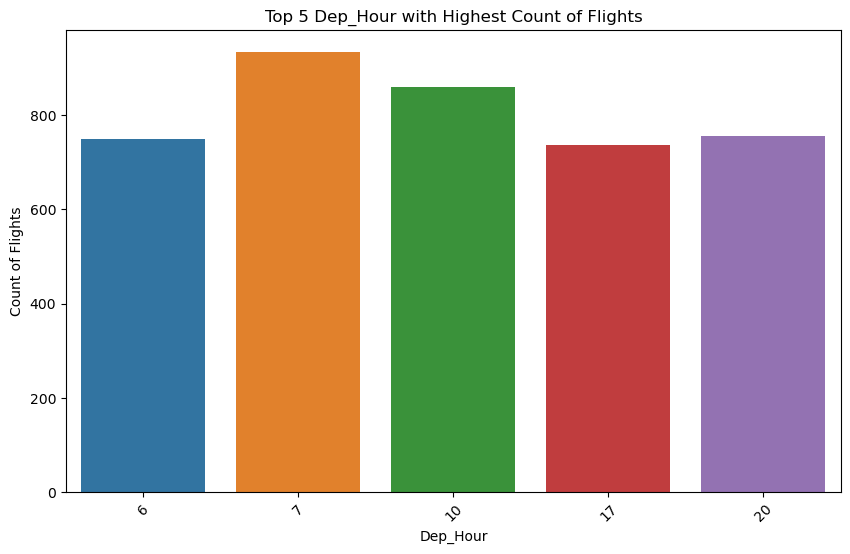

In [63]:
# Calculate the count of flights for each Hour
flight_counts = df['Dep_Hour'].value_counts().reset_index()
flight_counts.columns = ['Dep_Hour', 'Count']

# Sort the data in descending order based on the count of flights
sorted_counts = flight_counts.sort_values('Count', ascending=False)

# Select the top 5 days with the highest count
top_5_days = sorted_counts.head(5)

# Plot a bar chart to visualize the count of flights for the top 5 Hour
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_days, x='Dep_Hour', y='Count')

# Set labels and title for the plot
plt.xlabel('Dep_Hour')
plt.ylabel('Count of Flights')
plt.title('Top 5 Dep_Hour with Highest Count of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

# 🛠️ Feature Engineering <a name="feature-engineering"></a> 

In [64]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,17


#### ⚖️ Scaling <a name="scaling"></a>

In [65]:
# scaler object
sc = StandardScaler()

In [66]:
# Scaling 'Duration' Column
df['Duration'] = sc.fit_transform(df['Duration'].values.reshape(-1, 1))

In [67]:
# Scaling 'Dep_Hour' Column
df['Dep_Hour'] = sc.fit_transform(df['Dep_Hour'].values.reshape(-1, 1))

In [68]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,-0.918323,0,No info,3897,24,3,1.608027
1,Air India,Kolkata,Banglore,-0.369065,2,No info,7662,1,5,-1.178392
2,Jet Airways,Delhi,Cochin,1.019061,2,No info,13882,9,6,-0.655938
3,IndiGo,Kolkata,Banglore,-0.608741,1,No info,6218,12,5,0.911422
4,IndiGo,Banglore,New Delhi,-0.688633,1,No info,13302,1,3,0.737271


#### 🏷️ Encoding <a name="encoding"></a>

#### 'Airline' Column

In [69]:
# create Label Encoder object
le = LabelEncoder()

In [70]:
# Encoding 'Airline' column
df['Airline_en'] = le.fit_transform(df['Airline'])

In [71]:
#show the encoded values
Airline_encodeing = df[['Airline', 'Airline_en']].drop_duplicates()
Airline_encodeing

,Airline,Airline_en
0,IndiGo,3
1,Air India,1
2,Jet Airways,4
5,SpiceJet,8
9,Multiple carriers,6
20,GoAir,2
28,Vistara,10
43,Air Asia,0
426,Vistara Premium economy,11
657,Jet Airways Business,5


#### 'Source' Column

In [72]:
# Encoding 'Source' column
df['Source_en'] = le.fit_transform(df['Source'])

In [73]:
#show the encoded values
Source_encodeing = df[['Source', 'Source_en']].drop_duplicates()
Source_encodeing

,Source,Source_en
0,Banglore,0
1,Kolkata,3
2,Delhi,2
12,Chennai,1
59,Mumbai,4


#### 'Destination' Column

In [74]:
# Encoding 'Destination' column
df['Destination_en'] = le.fit_transform(df['Destination'])

In [75]:
#show the encoded values
Destination_encodeing = df[['Destination', 'Destination_en']].drop_duplicates()
Destination_encodeing

,Destination,Destination_en
0,New Delhi,5
1,Banglore,0
2,Cochin,1
12,Kolkata,4
22,Delhi,2
59,Hyderabad,3


#### 'Additional_Info' Column

In [76]:
# Encoding 'Additional_Info' column
df['Additional_Info_en'] = le.fit_transform(df['Additional_Info'])

In [77]:
#show the encoded values
Additional_Info_encodeing = df[['Additional_Info', 'Additional_Info_en']].drop_duplicates()
Additional_Info_encodeing

,Additional_Info,Additional_Info_en
0,No info,7
6,In-flight meal not included,5
45,No check-in baggage included,6
785,1 Short layover,1
1043,1 Long layover,0
1712,Change airports,4
2924,Business class,3
8122,Red-eye flight,8
10511,2 Long layover,2


### 🗑️ Dropping Unimportant Columns <a name="dropping-unimportant-columns-1"></a>

In [78]:
df = df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'],
             axis=1)

# 🔬 PCA <a name="pca"></a>

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=4)

In [81]:
df_pca = pca.fit_transform(df.drop('Price', axis=1))

In [82]:
pca.explained_variance_ratio_

array([0.83986205, 0.06615133, 0.03835643, 0.01492429])

In [83]:
df2 = pd.DataFrame(pca.components_, columns=df.drop('Price', axis=1).columns)

In [84]:
sums = np.abs(df2).sum()
sums_df = pd.DataFrame([sums], columns=df2.columns)
sums_df

,Duration,Total_Stops,Day,Month,Dep_Hour,Airline_en,Source_en,Destination_en,Additional_Info_en
0,0.874218,0.521618,1.014091,1.045535,0.139012,1.144156,0.654527,0.814248,0.176119


##### The PCA algorithm shows that all columns are important in predicting the Price

## 📂 Splitting Data <a name="splitting-data"></a>

In [85]:
# Feature Extraction
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(9415, 9)
(1047, 9)


# ⚙️ Initialize estimators and hyperparameters <a name="initialize-estimators-and-hyperparameters"></a>

In [87]:

# Initialize the estimators
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = LogisticRegression()
reg4 = GradientBoostingRegressor()
reg5 = RandomForestRegressor()
reg6 = SVR()

In [88]:

# Initialize the hyperparameters
# Linear Regression
param1 = {}
param1['regressor'] = [reg1]                 # No hyperparameters

# Lasso
param2 = {}
param2['regressor'] = [reg2]
param2['regressor__alpha'] = [0.1, 0.01, 0.001]         #Regularization parameter

# Logistic Regression
param3 = {}
param3['regressor'] = [reg3]
param3['regressor__C'] = [1.0, 10, 100]                 # Regularization parameter

# Gradient Boosting
param4 = {}
param4['regressor'] = [reg4]
param4['regressor__max_depth'] = [3, 5]                  # Maximum depth of each tree
param4['regressor__n_estimators'] = [10, 100, 1000]      # Number of boosting stages
param4['regressor__learning_rate'] = [0.1, 0.01, 0.001]  # Learning rate

# RandomForest
param5 = {}
param5['regressor'] = [reg5]
param5['regressor__n_estimators'] = [10, 100, 1000]          # Number of trees in the forest
param5['regressor__max_depth'] = [3, 5]                  # Maximum depth of each tree

# SVR
param6 = {}
param6['regressor'] = [reg6]
param6['regressor__C'] = [1.0, 10, 100]                   # Regularization parameter
param6['regressor__kernel'] = ['linear', 'rbf']           # Kernel function


In [89]:

pipeline = Pipeline([('regressor', reg1)])
params = [param1, param2, param3, param4, 
          param5, param6]


# 📅 Grid Search CV <a name="grid-search-cv"></a>

In [199]:
%%time
# Perform grid search cross-validation
grid = GridSearchCV(pipeline, params, cv=3).fit(X_train, y_train)

C:\Users\CM\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CM\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

CPU times: total: 16min 6s
Wall time: 6min 47s


In [200]:
# Best performing model and its corresponding hyperparameters
grid.best_params_

{'regressor': GradientBoostingRegressor(),
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 5,
 'regressor__n_estimators': 1000}

In [201]:
# r2 score for the best model
grid.best_score_

0.8436221766527394

# 🎯 Randomized Search CV <a name="randomized-search-cv"></a>

In [202]:
%%time
# Perform randomized search cross-validation
rs = RandomizedSearchCV(pipeline, params, cv=3, scoring='r2').fit(X_train, y_train)

C:\Users\CM\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CM\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

CPU times: total: 9min 3s
Wall time: 3min 12s


In [203]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'regressor__n_estimators': 1000,
 'regressor__max_depth': 3,
 'regressor__learning_rate': 0.1,
 'regressor': GradientBoostingRegressor()}

In [204]:
# r2 score for the best model
rs.best_score_

0.842536562819074

# 📈 The best Model Training <a name="the-best-model-training"></a>

In [90]:
model = GradientBoostingRegressor(learning_rate= 0.1, max_depth=5, n_estimators= 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
r2_score(y_test, y_pred)

0.878529723903416

In [92]:
mean_squared_error(y_test, y_pred)

2485144.6486199987

# 💾 Saving the model <a name="saving-the-model"></a>

In [93]:
import joblib

In [94]:
joblib.dump(model, 'aviation_flight_fare_prediction_model.p')

['aviation_flight_fare_prediction_model.p']

# 🧪 Test Data Preparation <a name="test-data-preparation"></a>

In [ ]:
df1 = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx')

In [95]:
df1 = pd.read_excel("Test_set.xlsx")

In [96]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# 🔍Discovering Data

In [97]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## ❓Missing Values

In [99]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## 🔄Duplicates

In [100]:
df1.duplicated().sum()

26

In [101]:
# drop the duplicate rows only
df1.drop_duplicates(inplace=True, keep='first')

In [102]:
df1.duplicated().sum()

0

## ⭕Categorical Columns

##### 'Airline' Column

In [103]:
df1['Airline'].value_counts()

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [104]:
df1['Airline'].nunique()

11

##### 'Additional_Info' Column

In [105]:
df1['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [106]:
df1['Additional_Info'].nunique()

6

##### 'Destination' Column

In [107]:
df1['Destination'].value_counts()

Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [108]:
df1['Destination'].nunique()

6

##### 'Source' Column

In [109]:
df1['Source'].value_counts()

Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [110]:
df1['Source'].nunique()

5

##### 'Total_Stops' Column

In [111]:
df1['Total_Stops'].value_counts()

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [112]:
# delete stop word and keep number of stops only
df1['Total_Stops'] = df1['Total_Stops'].str.replace('non-stop','0').str.replace(' ', '')\
                                     .str.replace('stop','').str.replace('s','')

In [113]:
df1['Total_Stops'].value_counts()

1    1427
0     846
2     360
3      11
4       1
Name: Total_Stops, dtype: int64

In [114]:
df1['Total_Stops'].nunique()

5

## 🔢Numerical Columns

In [115]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info


##### 'Duration' Column

In [116]:
df1['Duration'].head()

0    10h 55m
1         4h
2    23h 45m
3        13h
4     2h 50m
Name: Duration, dtype: object

In [117]:
# convert hours to minutes and delete 'h, m'.
df1['Duration'] = df1['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '')
# convert the column to int data type
df1['Duration'] = df1['Duration'].apply(eval).astype('int64')

In [118]:
df1['Duration'].head()

0     655
1     240
2    1425
3     780
4     170
Name: Duration, dtype: int64

## ⏰Time Columns

#### 'Date_of_Journey' Column

In [119]:
# Extract day, month, and year from 'Date_of_Journey' column
df1[['Day', 'Month', 'Year']] = df1['Date_of_Journey'].str.split('/', expand=True)

In [120]:
# check values of days
df1['Day'].value_counts()

9     341
6     309
15    262
21    255
12    252
24    251
1     238
27    219
3     207
18    203
01     34
06     28
03     26
09     20
Name: Day, dtype: int64

In [121]:
# delete 0 from the day number
df1['Day'] = df1['Day'].str.replace('0', '')

In [122]:
df1['Day'].unique()

array(['6', '12', '21', '24', '1', '15', '18', '3', '9', '27'],
      dtype=object)

In [123]:
# check values of Months
df1['Month'].value_counts()

06    859
05    857
03    682
04    247
Name: Month, dtype: int64

In [124]:
# delete 0 from the Month number
df1['Month'] = df1['Month'].str.replace('0', '')

In [125]:
df1['Month'].unique()

array(['6', '5', '3', '4'], dtype=object)

In [126]:
# # check values of Years
df1['Year'].value_counts()

2019    2645
Name: Year, dtype: int64

#### 'Dep_Time' Column

In [127]:
# convert Dep_Time column to datetime object
df1['Dep_Time'] = pd.to_datetime(df1['Dep_Time'])

In [128]:
# increase the hour if the minutes above 30
def apro_time(time):
    adjusted_time = time + pd.DateOffset(hours=1) if time.minute > 30 else time
    
    return adjusted_time.hour

In [129]:
# apply 'apro_time' on 'Dep_Time' column
df1['Dep_Hour'] = df1['Dep_Time'].apply(apro_time)

## 🗑️ Dropping Unimportant Columns

In [130]:
# delete unimportant columns
df1 = df1.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Dep_Time', 'Year'], axis=1)

In [131]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour
0,Jet Airways,Delhi,Cochin,655,1,No info,6,6,17
1,IndiGo,Kolkata,Banglore,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included,21,5,19
3,Multiple carriers,Delhi,Cochin,780,1,No info,21,5,8
4,Air Asia,Banglore,Delhi,170,0,No info,24,6,0


# 🛠️Feature Engineering 

In [132]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour
0,Jet Airways,Delhi,Cochin,655,1,No info,6,6,17
1,IndiGo,Kolkata,Banglore,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included,21,5,19
3,Multiple carriers,Delhi,Cochin,780,1,No info,21,5,8
4,Air Asia,Banglore,Delhi,170,0,No info,24,6,0


#### ⚖️ Scaling

In [133]:
# Scaling 'Duration' Column
df1['Duration'] = sc.fit_transform(df1['Duration'].values.reshape(-1, 1))

In [134]:
# Scaling 'Dep_Hour' Column
df1['Dep_Hour'] = sc.fit_transform(df1['Dep_Hour'].values.reshape(-1, 1))

In [135]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour
0,Jet Airways,Delhi,Cochin,0.038653,1,No info,6,6,0.715939
1,IndiGo,Kolkata,Banglore,-0.789942,1,No info,12,5,-1.221038
2,Jet Airways,Delhi,Cochin,1.576046,1,In-flight meal not included,21,5,1.068117
3,Multiple carriers,Delhi,Cochin,0.288230,1,No info,21,5,-0.868860
4,Air Asia,Banglore,Delhi,-0.929705,0,No info,24,6,-2.277571


#### 🏷️ Encoding

#### 'Airline' Column

In [136]:
# create Label Encoder object
le = LabelEncoder()

In [137]:
# Encoding 'Airline' column
df1['Airline_en'] = le.fit_transform(df1['Airline'])

In [138]:
#show the encoded values
Airline_encodeing1 = df1[['Airline', 'Airline_en']].drop_duplicates()
Airline_encodeing1

,Airline,Airline_en
0,Jet Airways,4
1,IndiGo,3
3,Multiple carriers,6
4,Air Asia,0
6,Air India,1
17,Vistara,9
35,SpiceJet,8
64,Vistara Premium economy,10
82,GoAir,2
1054,Multiple carriers Premium economy,7


#### 'Source' Column

In [139]:
# Encoding 'Source' column
df1['Source_en'] = le.fit_transform(df1['Source'])

In [140]:
#show the encoded values
Source_encodeing1 = df1[['Source', 'Source_en']].drop_duplicates()
Source_encodeing1

,Source,Source_en
0,Delhi,2
1,Kolkata,3
4,Banglore,0
34,Mumbai,4
45,Chennai,1


#### 'Destination' Column

In [141]:
# Encoding 'Destination' column
df1['Destination_en'] = le.fit_transform(df1['Destination'])

In [142]:
#show the encoded values
Destination_encodeing1 = df1[['Destination', 'Destination_en']].drop_duplicates()
Destination_encodeing1

,Destination,Destination_en
0,Cochin,1
1,Banglore,0
4,Delhi,2
6,New Delhi,5
34,Hyderabad,3
45,Kolkata,4


#### 'Additional_Info' Column

In [143]:
# Encoding 'Additional_Info' column
df1['Additional_Info_en'] = le.fit_transform(df1['Additional_Info'])

In [144]:
#show the encoded values
Additional_Info_encodeing1 = df1[['Additional_Info', 'Additional_Info_en']].drop_duplicates()
Additional_Info_encodeing1

,Additional_Info,Additional_Info_en
0,No info,5
2,In-flight meal not included,3
35,No check-in baggage included,4
954,1 Long layover,0
1802,Business class,1
1861,Change airports,2


### 🗑️Dropping unimportant columns

In [145]:
df1 = df1.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'],
             axis=1)

# 🔄 Load the Model and Predict the Test Data

In [146]:
model = joblib.load('aviation_flight_fare_prediction_model.p')

In [147]:
df1['Price'] = model.predict(df1).reshape(-1, 1)

C:\Users\CM\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [148]:
df1.head()

,Duration,Total_Stops,Day,Month,Dep_Hour,Airline_en,Source_en,Destination_en,Additional_Info_en,Price
0,0.038653,1,6,6,0.715939,4,2,1,5,10154.535566
1,-0.789942,1,12,5,-1.221038,3,3,0,5,3934.219103
2,1.576046,1,21,5,1.068117,4,2,1,3,19954.570483
3,0.288230,1,21,5,-0.868860,6,2,1,5,10651.985466
4,-0.929705,0,24,6,-2.277571,0,0,2,5,3828.236612


## <span style="color:Brown; font-family:Arial;">Thanks, [OmaymaAli](https://github.com/Omayma-ali)</span>